# McKinsey Analytics Online Hackathon - July 2018
     
    

### Problem Statement 

Client is an Insurance company and they need a predictive model to predict the propensity to pay renewal premium and 
build an incentive plan for its agents to maximise the net revenue (i.e. renewals - incentives given to collect the renewals) collected from the policies post their issuance.

have information about past transactions from the policy holders along with their demographics. The client has provided aggregated historical transactional data like number of premiums delayed by 3/ 6/ 12 months across all the products, number of premiums paid, customer sourcing channel and customer demographics like age, monthly income and area type.

**EVALUATION CRITERIA**

Solutions will be evaluated on 2 criteria:

[A] The base probability of receiving a premium on a policy without considering any incentive.

[B] The monthly incentives you will provide on each policy to maximize the net revenue 


In [148]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring the Data

In [149]:
# Load the datasets

train_df = pd.read_csv('C:\\Users\\satish\\Desktop\\J2018\\train.csv', index_col='id')
test_df  = pd.read_csv('C:\\Users\\satish\\Desktop\\J2018\\test.csv',  index_col='id')

In [150]:
# make copy of the datasets

train = train_df.copy()
test  = test_df.copy()

In [151]:
# Display the dimensions of the data sets

print("train data set dimensions:",train.shape)
print("test data set dimensions:",test.shape)

train data set dimensions: (79853, 12)
test data set dimensions: (34224, 11)


In [152]:
# Display the header of the train data set

train.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
id,,,,,,,,,,,,
110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [153]:
# Display the information of the TRAIN data set

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79853 entries, 110936 to 71531
Data columns (total 12 columns):
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_days                         79853 non-null int64
Income                              79853 non-null int64
Count_3-6_months_late               79756 non-null float64
Count_6-12_months_late              79756 non-null float64
Count_more_than_12_months_late      79756 non-null float64
application_underwriting_score      76879 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null object
residence_area_type                 79853 non-null object
premium                             79853 non-null int64
renewal                             79853 non-null int64
dtypes: float64(5), int64(5), object(2)
memory usage: 7.9+ MB


Text(0,0.5,'Frequency')

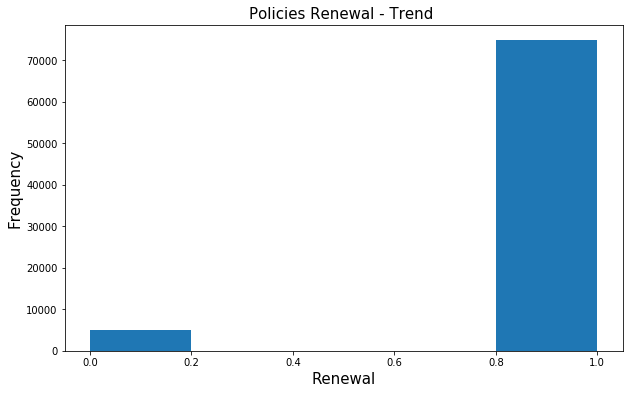

In [154]:
# Target feature - visualization

plt.figure(figsize=(10,6))
plt.hist(train.renewal, bins=5)
plt.title('Policies Renewal - Trend ', size=15)
plt.xlabel('Renewal', size=15)
plt.ylabel('Frequency', size=15)

very much Imbalanced dataset

### Missing values Treatment

In [155]:
# [TRAIN DataSet] Missing values - checking

train.isnull().sum().sort_values(ascending=False)

application_underwriting_score      2974
Count_more_than_12_months_late        97
Count_6-12_months_late                97
Count_3-6_months_late                 97
renewal                                0
premium                                0
residence_area_type                    0
sourcing_channel                       0
no_of_premiums_paid                    0
Income                                 0
age_in_days                            0
perc_premium_paid_by_cash_credit       0
dtype: int64

In [156]:
# [TEST DataSet] Missing values - checking

test.isnull().sum().sort_values(ascending=False)

application_underwriting_score      1323
Count_more_than_12_months_late        31
Count_6-12_months_late                31
Count_3-6_months_late                 31
premium                                0
residence_area_type                    0
sourcing_channel                       0
no_of_premiums_paid                    0
Income                                 0
age_in_days                            0
perc_premium_paid_by_cash_credit       0
dtype: int64

In [157]:
# [TRAIN Data set] check the percentage of missing values

total   = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()*100/train['renewal'].count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                                  Total   Percent
application_underwriting_score     2974  3.724343
Count_more_than_12_months_late       97  0.121473
Count_6-12_months_late               97  0.121473
Count_3-6_months_late                97  0.121473
renewal                               0  0.000000
premium                               0  0.000000
residence_area_type                   0  0.000000
sourcing_channel                      0  0.000000
no_of_premiums_paid                   0  0.000000
Income                                0  0.000000
age_in_days                           0  0.000000
perc_premium_paid_by_cash_credit      0  0.000000


In [158]:
# [TEST Data set] check the percentage of missing values

total   = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()*100/test['Income'].count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                                  Total   Percent
application_underwriting_score     1323  3.865708
Count_more_than_12_months_late       31  0.090580
Count_6-12_months_late               31  0.090580
Count_3-6_months_late                31  0.090580
premium                               0  0.000000
residence_area_type                   0  0.000000
sourcing_channel                      0  0.000000
no_of_premiums_paid                   0  0.000000
Income                                0  0.000000
age_in_days                           0  0.000000
perc_premium_paid_by_cash_credit      0  0.000000


In [159]:
# [TRAIN Data set] verification of Feature ['application_underwriting_score']

train.application_underwriting_score.describe()

count    76879.000000
mean        99.067291
std          0.739799
min         91.900000
25%         98.810000
50%         99.210000
75%         99.540000
max         99.890000
Name: application_underwriting_score, dtype: float64

In [160]:
# [TRAIN Data set] verification of Feature ['application_underwriting_score']

test.application_underwriting_score.describe()

count    32901.000000
mean        99.061898
std          0.742942
min         91.900000
25%         98.800000
50%         99.210000
75%         99.530000
max         99.890000
Name: application_underwriting_score, dtype: float64

In [161]:
# [TRAIN & TEST Data set] resetting Missing values of Feature ['application_underwriting_score']
# setting to min value after examining the feature 

train['application_underwriting_score'].fillna(value=91.90,inplace=True)
test['application_underwriting_score'].fillna(value=91.90,inplace=True)

In [162]:
# [TRAIN Data set] verification of Feature ['Count_3-6_months_late']

train['Count_3-6_months_late'].describe()

count    79756.000000
mean         0.248671
std          0.691468
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: Count_3-6_months_late, dtype: float64

In [163]:
# [TRAIN Data set] verification of Feature ['Count_6-12_months_late']

train['Count_6-12_months_late'].describe()

count    79756.000000
mean         0.078188
std          0.436507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: Count_6-12_months_late, dtype: float64

In [164]:
# [TRAIN Data set] verification of Feature ['Count_more_than_12_months_late']

train.Count_more_than_12_months_late.describe()

count    79756.000000
mean         0.060008
std          0.312023
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: Count_more_than_12_months_late, dtype: float64

In [165]:
# [Train DataSet] - verification of the max value of feature

train[train['Count_more_than_12_months_late']==11]

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
id,,,,,,,,,,,,
61336,0.879,14613,360050,0.0,2.0,11.0,98.5,21,A,Urban,15900,0


In [166]:
# [Train DataSet] - verification of the max value of feature

train[train['Count_3-6_months_late']==13]

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
id,,,,,,,,,,,,
111787,0.999,17526,362530,13.0,0.0,0.0,99.1,17,D,Urban,22200,0


In [167]:
# [Train DataSet] - verification of the max value of feature

train[train['Count_6-12_months_late']==17]

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
id,,,,,,,,,,,,
47348,0.61,22644,81120,0.0,17.0,0.0,99.35,9,A,Urban,5400,0


In [168]:
# [Train DataSet] - verification of the feature of nan value

train[train['Count_more_than_12_months_late'].isnull()]

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
id,,,,,,,,,,,,
73099,1.0,15336,210100,NaN,NaN,NaN,91.90,2,A,Urban,9600,0
81690,1.0,7679,39040,NaN,NaN,NaN,91.90,2,A,Rural,1200,0
49862,1.0,10593,49520,NaN,NaN,NaN,91.90,2,A,Rural,1200,0
59,1.0,17891,90100,NaN,NaN,NaN,91.90,2,A,Urban,5700,1
19184,1.0,18260,40530,NaN,NaN,NaN,91.90,2,A,Rural,1200,0
74860,1.0,17535,36130,NaN,NaN,NaN,91.90,2,A,Urban,5700,0
61476,1.0,9139,90090,NaN,NaN,NaN,91.90,2,A,Urban,5400,1
52266,1.0,9501,30040,NaN,NaN,NaN,91.90,2,A,Urban,1200,0
14736,1.0,14612,216650,NaN,NaN,NaN,91.90,2,C,Rural,1200,1


After verification - these features can be set to 0

1.Count_more_than_12_months_late

2.Count_6-12_months_late

3.Count_3-6_months_late

In [169]:
# [Train DataSet] - verification of the feature of nan value after replacing the missing values

train.isnull().sum().sort_values(ascending=False)

Count_more_than_12_months_late      97
Count_6-12_months_late              97
Count_3-6_months_late               97
renewal                              0
premium                              0
residence_area_type                  0
sourcing_channel                     0
no_of_premiums_paid                  0
application_underwriting_score       0
Income                               0
age_in_days                          0
perc_premium_paid_by_cash_credit     0
dtype: int64

In [170]:
# [TEST DataSet] - verification of the feature of nan value after replacing the missing values

test.isnull().sum().sort_values(ascending=False)

Count_more_than_12_months_late      31
Count_6-12_months_late              31
Count_3-6_months_late               31
premium                              0
residence_area_type                  0
sourcing_channel                     0
no_of_premiums_paid                  0
application_underwriting_score       0
Income                               0
age_in_days                          0
perc_premium_paid_by_cash_credit     0
dtype: int64

In [171]:
# Setting the missing values to 0 for these 3 features 
train.fillna(value=0,inplace=True)
test.fillna(value=0,inplace=True)

In [172]:
# [TRAIN DATA SET] seperate out the Categorical and Numerical features

numerical_feature   = train.dtypes[train_df.dtypes!= 'object'].index
categorical_feature = train.dtypes[train_df.dtypes== 'object'].index

print ("There are {} numeric and {} categorical columns in train data"
       .format(numerical_feature.shape[0],categorical_feature.shape[0]))

There are 10 numeric and 2 categorical columns in train data


In [173]:
#[TRAIN DataSet] Display of the numeric features
numerical_feature.tolist()

['perc_premium_paid_by_cash_credit',
 'age_in_days',
 'Income',
 'Count_3-6_months_late',
 'Count_6-12_months_late',
 'Count_more_than_12_months_late',
 'application_underwriting_score',
 'no_of_premiums_paid',
 'premium',
 'renewal']

In [174]:
#[TRAIN DataSet] Display of the categorical features
categorical_feature.tolist()

['sourcing_channel', 'residence_area_type']

In [175]:
#[TRAIN DataSet] categorical feature- values verification
train.residence_area_type.value_counts()

Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

In [176]:
#[TRAIN DataSet] categorical feature- values verification
train.sourcing_channel.value_counts()

A    43134
B    16512
C    12039
D     7559
E      609
Name: sourcing_channel, dtype: int64

In [177]:
#[TEST DataSet] categorical feature- values verification
test.residence_area_type.value_counts()

Urban    20608
Rural    13616
Name: residence_area_type, dtype: int64

In [178]:
#[TEST DataSet] categorical feature- values verification
train.sourcing_channel.value_counts()

A    43134
B    16512
C    12039
D     7559
E      609
Name: sourcing_channel, dtype: int64

In [179]:
# One-Hot encoding of categorical features
train = pd.get_dummies(train)
test  = pd.get_dummies(test)

In [180]:
# [TRAIN DataSet ] - dimensions after encoding
train.shape

(79853, 17)

In [181]:
# [TEST DataSet ] - dimensions after encoding
test.shape

(34224, 16)

In [182]:
# Numeric features of Dataset without the target feature
numeric=['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'premium']

In [183]:
#[TRAIN and TEST Dataset] Normalizing Numerical Features 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


train[numeric]=scaler.fit_transform(train[numeric])
test[numeric] = scaler.fit_transform(test[numeric])

C:\Users\satish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\satish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


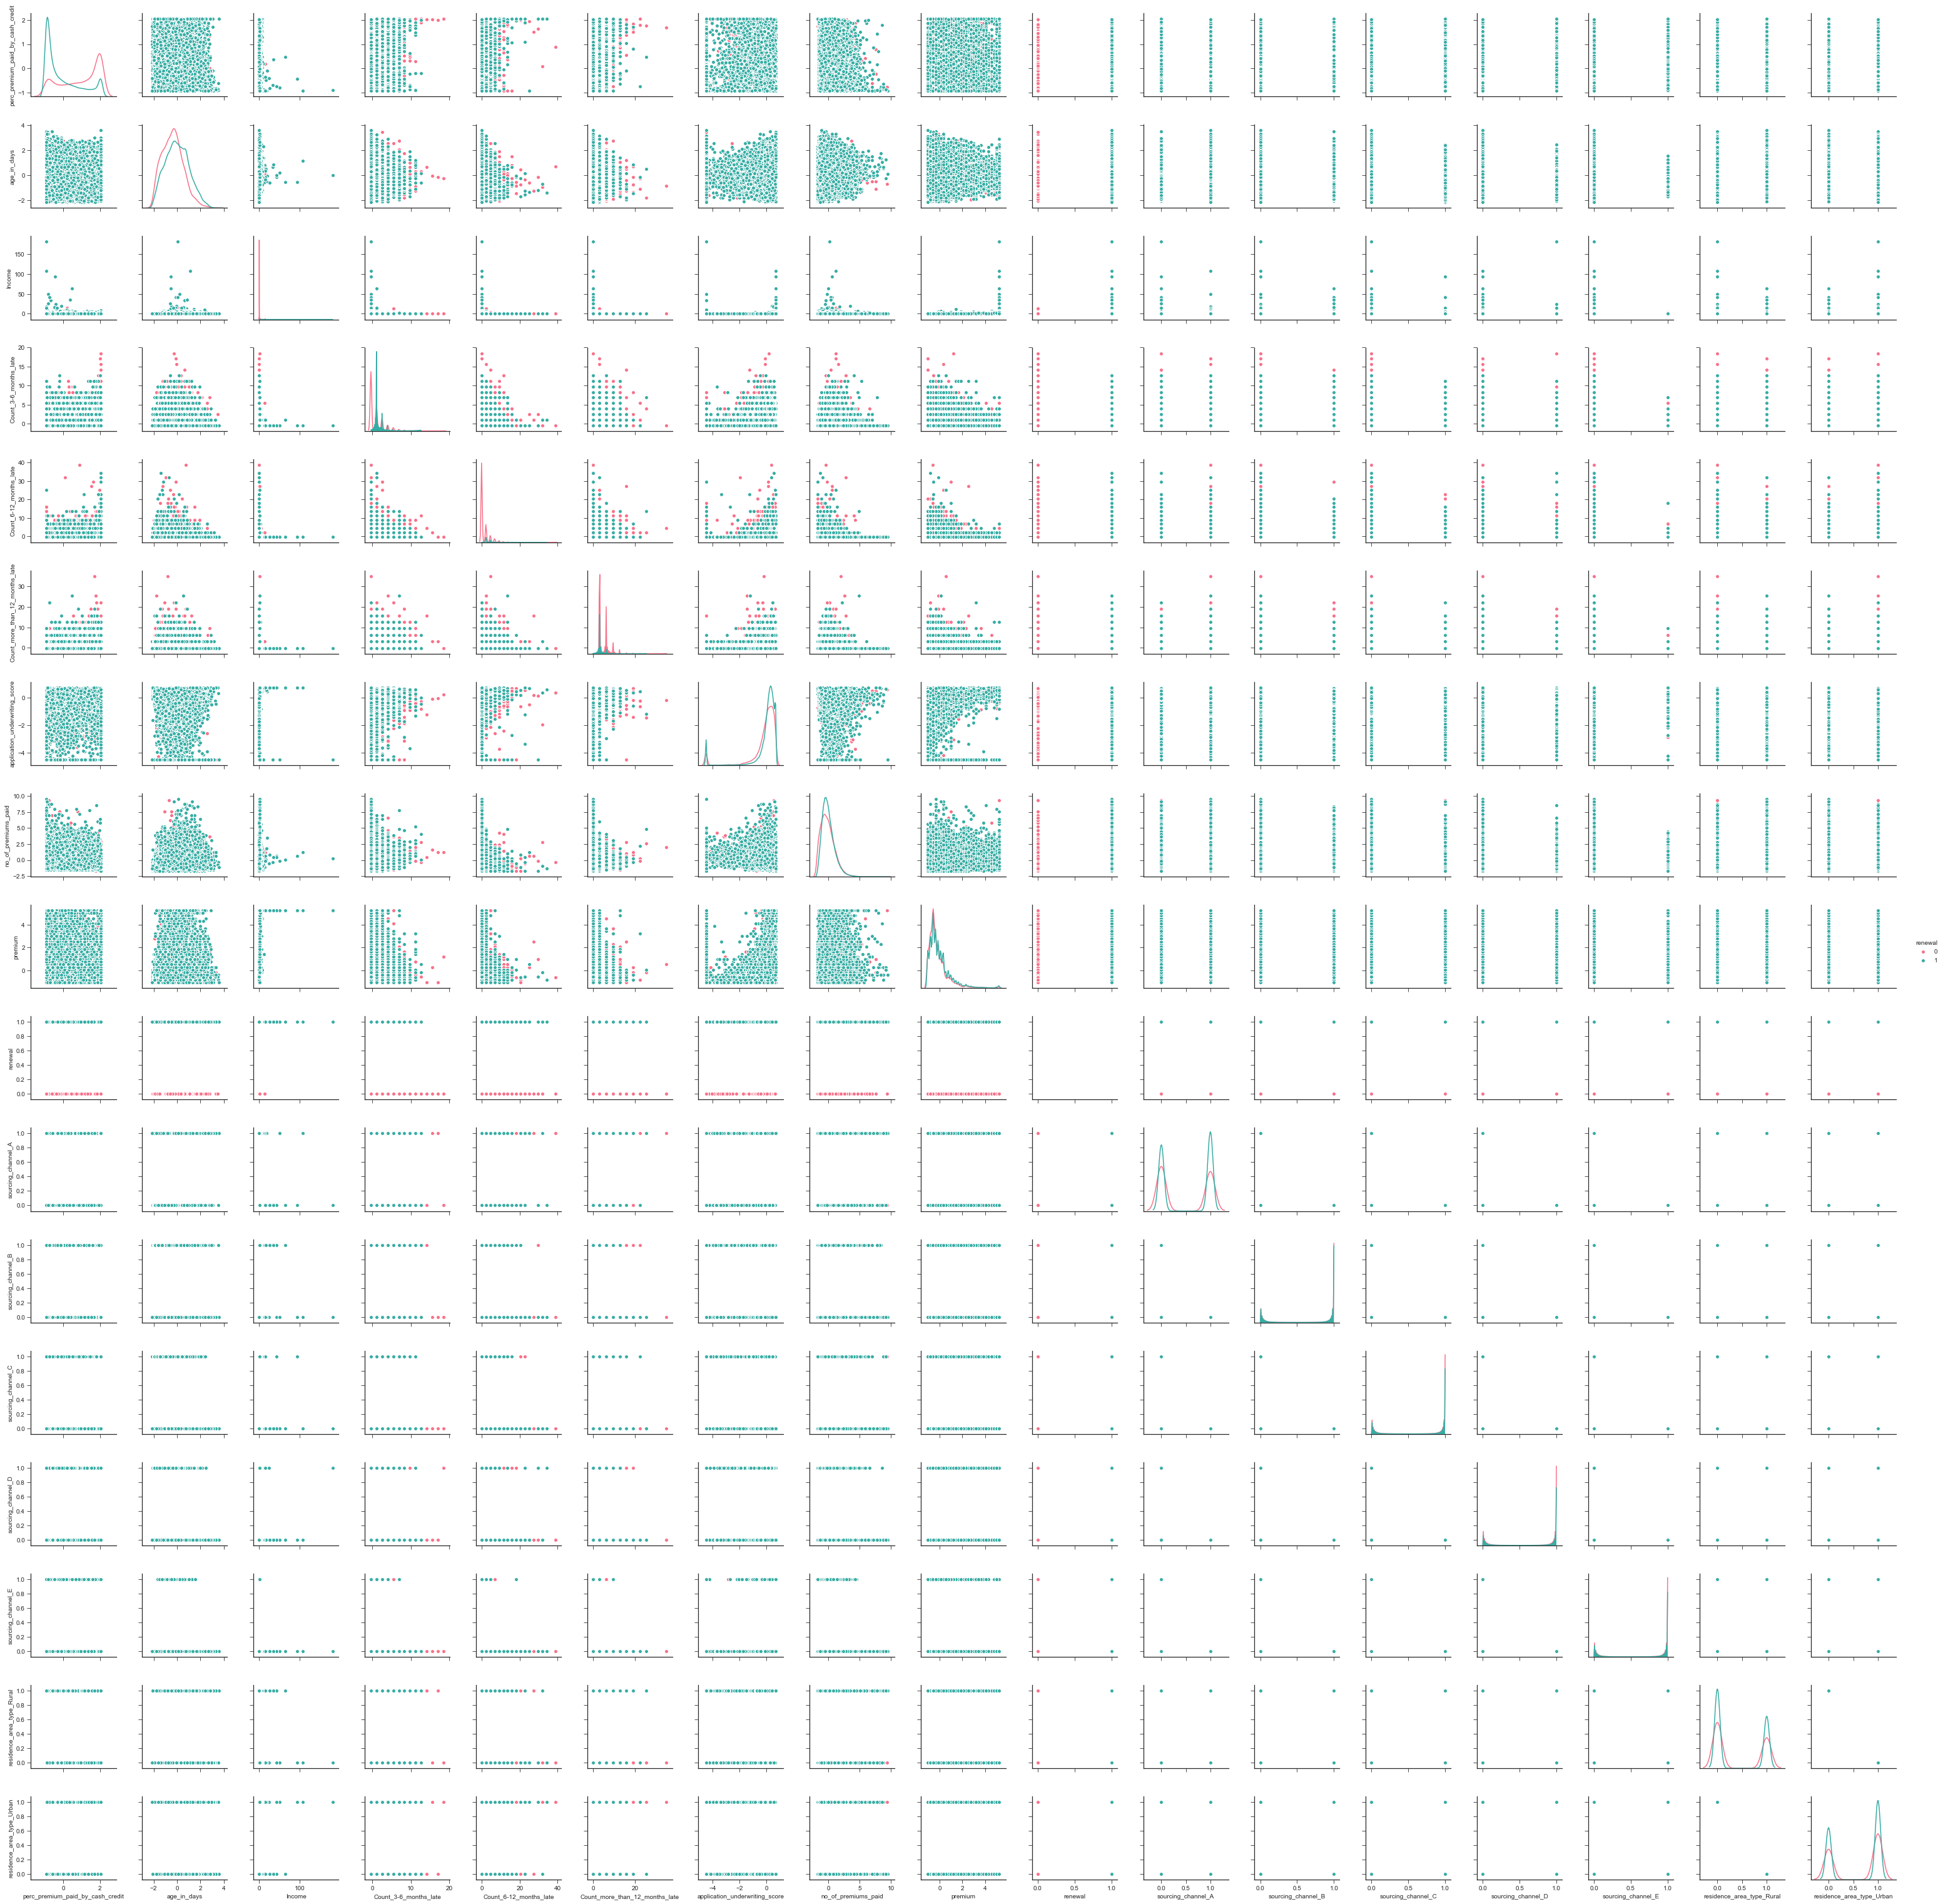

In [185]:
sns.set_style("ticks")
sns.pairplot(train,hue = 'renewal',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

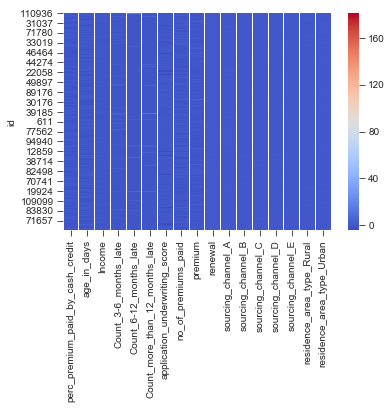

In [187]:
sns.heatmap(train, cmap='coolwarm')

In [188]:
# Split the data into features and target label
target   = train['renewal']
features = train.drop('renewal', axis = 1)

In [189]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.25, 
                                                    random_state = 101)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 59889 samples.
Testing set has 19964 samples.


### Model Construction & Evaluation

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [191]:
lgbmc = LGBMClassifier()

In [192]:
lgbmc.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [193]:
lgbmc.fit(X_train,y_train)

predictions = lgbmc.predict(X_test)

print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test,predictions)))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictions)

print('AUC -',auc(false_positive_rate, true_positive_rate))
print('ROC -',roc_auc_score(y_test, predictions))

Final accuracy score on the testing data: 0.9383
             precision    recall  f1-score   support

          0       0.56      0.14      0.23      1274
          1       0.94      0.99      0.97     18690

avg / total       0.92      0.94      0.92     19964

[[  183  1091]
 [  141 18549]]
AUC - 0.5680489654807472
ROC - 0.5680489654807472


C:\Users\satish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Gridsearchcv done - but noticed default values the best 
tried with many algorithms and finally restricted to LGBM classifier.

** could not able to get better AUC with any other models...all are around of 0.55
** something more to study to improve here **

In [194]:
pred_Prob = lgbmc.predict_proba(X_test)

In [195]:
pred_Prob

array([[0.14702591, 0.85297409],
       [0.06853132, 0.93146868],
       [0.7541221 , 0.2458779 ],
       ...,
       [0.02703083, 0.97296917],
       [0.02202381, 0.97797619],
       [0.00688736, 0.99311264]])

Text(0,0.5,'Feature Importance Score')

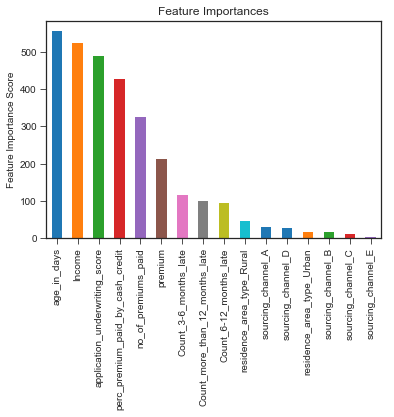

In [197]:
# Feature Importance 

target = 'renewal'
IDcol  = 'id'

predictors = [x for x in train.columns if x not in [target, IDcol]]

feat_imp = pd.Series(lgbmc.feature_importances_,predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

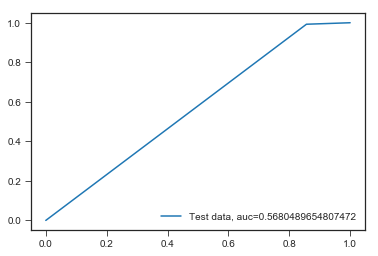

In [199]:
#roc_auc curve
plt.plot(false_positive_rate, true_positive_rate,label="Test data, auc="+str(roc_auc_score(y_test, predictions)))
plt.legend(loc=4)
plt.show()

#### Part A - prediction probabilites [target - renewal]

In [200]:
#[TEST DATA] - prediction probabilities
test_pred_prob=lgbmc.predict_proba(test)

In [201]:
#checking the dimension of - prediction probabilities
len(test_pred_prob)

34224

In [202]:
#test_pred_prob[0]
test_pred_prob

array([[0.02052827, 0.97947173],
       [0.01648684, 0.98351316],
       [0.28770994, 0.71229006],
       ...,
       [0.03420272, 0.96579728],
       [0.21641351, 0.78358649],
       [0.01526727, 0.98473273]])

In [203]:
# adding the probability matrix to test data set

test['prediction0'] = test_pred_prob[:,0]
test['prediction1'] = test_pred_prob[:,1]

In [204]:
# [Test Data set verification]
test.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban,prediction0,prediction1
id,,,,,,,,,,,,,,,,,,
649,-0.938344,1.631539,-0.561222,-0.347754,-0.177465,-0.189173,0.707844,-0.745751,-0.813427,1,0,0,0,0,1,0,0.020528,0.979472
81136,-0.570140,0.936021,0.304607,-0.347754,-0.177465,-0.189173,0.092862,1.554513,0.093413,1,0,0,0,0,0,1,0.016487,0.983513
70762,2.052192,-0.315302,-0.062128,-0.347754,-0.177465,-0.189173,-4.410599,-1.704195,0.093413,0,1,0,0,0,0,1,0.287710,0.712290
53935,-0.348619,-0.525349,-0.293359,-0.347754,-0.177465,-0.189173,0.137705,0.021004,-0.586717,0,1,0,0,0,1,0,0.022537,0.977463
15476,-0.818603,-1.569293,-0.010361,1.110230,-0.177465,-0.189173,0.246608,0.596070,-0.133297,1,0,0,0,0,1,0,0.031500,0.968500


In [205]:
# calculating the max of the probabilitis and assigning to new column

test['pred1']=test[['prediction0','prediction1']].max(axis=1)

In [206]:
# verification
test.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban,prediction0,prediction1,pred1
id,,,,,,,,,,,,,,,,,,,
649,-0.938344,1.631539,-0.561222,-0.347754,-0.177465,-0.189173,0.707844,-0.745751,-0.813427,1,0,0,0,0,1,0,0.020528,0.979472,0.979472
81136,-0.570140,0.936021,0.304607,-0.347754,-0.177465,-0.189173,0.092862,1.554513,0.093413,1,0,0,0,0,0,1,0.016487,0.983513,0.983513
70762,2.052192,-0.315302,-0.062128,-0.347754,-0.177465,-0.189173,-4.410599,-1.704195,0.093413,0,1,0,0,0,0,1,0.287710,0.712290,0.712290
53935,-0.348619,-0.525349,-0.293359,-0.347754,-0.177465,-0.189173,0.137705,0.021004,-0.586717,0,1,0,0,0,1,0,0.022537,0.977463,0.977463
15476,-0.818603,-1.569293,-0.010361,1.110230,-0.177465,-0.189173,0.246608,0.596070,-0.133297,1,0,0,0,0,1,0,0.031500,0.968500,0.968500


### Part B - Incentives

In [207]:
# [TEST Dataset] making NEW copy of the test dataset
test_part_b=test_df.copy()

In [208]:
# [TEST Dataset] verification
test_part_b.shape

(34224, 11)

In [209]:
#[TEST Dataset] - setting the probabilities of the RENEWAL [target feature]
test_part_b['renewal']=test['pred1']

In [210]:
# [TEST Dataset] verification
test_part_b.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
id,,,,,,,,,,,,
649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300,0.979472
81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700,0.983513
70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700,0.712290
53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400,0.977463
15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600,0.968500


In [211]:
# [TEST Dataset] verification
test_part_b.isnull().sum().sort_values(ascending=False)

application_underwriting_score      1323
Count_more_than_12_months_late        31
Count_6-12_months_late                31
Count_3-6_months_late                 31
renewal                                0
premium                                0
residence_area_type                    0
sourcing_channel                       0
no_of_premiums_paid                    0
Income                                 0
age_in_days                            0
perc_premium_paid_by_cash_credit       0
dtype: int64

In [212]:
# [TEST Dataset] RENEWAL verification
test_part_b.renewal.describe()

count    34224.000000
mean         0.942522
std          0.084705
min          0.500137
25%          0.937591
50%          0.975839
75%          0.988790
max          0.997206
Name: renewal, dtype: float64

In [213]:
# [TEST Dataset] missing values verification - not impact of these NULL values as model already build with clean DS
test_part_b.isnull().sum().sort_values(ascending=False)

application_underwriting_score      1323
Count_more_than_12_months_late        31
Count_6-12_months_late                31
Count_3-6_months_late                 31
renewal                                0
premium                                0
residence_area_type                    0
sourcing_channel                       0
no_of_premiums_paid                    0
Income                                 0
age_in_days                            0
perc_premium_paid_by_cash_credit       0
dtype: int64

In [214]:
# [TEST Dataset] verification
test_part_b.age_in_days.describe()

count    34224.000000
mean     18824.215346
std       5246.525604
min       7671.000000
25%      14972.000000
50%      18623.000000
75%      22636.000000
max      35785.000000
Name: age_in_days, dtype: float64

In [215]:
# [TEST Dataset] verification
test_part_b.premium.describe()

count    34224.000000
mean     10834.721248
std       9263.074506
min       1200.000000
25%       5400.000000
50%       7500.000000
75%      13800.000000
max      60000.000000
Name: premium, dtype: float64

In [216]:
# [TEST Dataset] verification
test_part_b.no_of_premiums_paid.describe()

count    34224.000000
mean        10.890428
std          5.216867
min          2.000000
25%          7.000000
50%         10.000000
75%         14.000000
max         59.000000
Name: no_of_premiums_paid, dtype: float64

In [217]:
# [TEST Dataset] Initialising the Incentives field
test_part_b['incentives']=0

In [218]:
#[TEST DataSet] renaming the columns as hypen in between the feature name is not allowed in describe function
test_part_b.rename(columns={'Count_6-12_months_late': 'Count_6_12_months_late', 'Count_3-6_months_late': 'Count_3_6_months_late'}, inplace=True)

In [219]:
#[TEST Dataset] final verification
test_part_b.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3_6_months_late,Count_6_12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,incentives
id,,,,,,,,,,,,,
649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300,0.979472,0
81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700,0.983513,0
70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700,0.712290,0
53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400,0.977463,0
15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600,0.968500,0


In [138]:
#test_part_b['incentives']=0

In [ ]:
'''
=======================
for i in range(test1['renewal'].count()):
    
    if (test1.iloc[i].Count_3_6_months_late.item()>0) | (test1.iloc[i].Count_6_12_months_late.item()>0) | (test1.iloc[i].Count_more_than_12_months_late.item()>0):
        late='Yes'
    else:
        late='No'
    
    if(test1.iloc[i].renewal.item()>0.5):
        if(test1.iloc[i].age_in_days.item()<=14972) & (test1.iloc[i].premium.item()>=7500) & (late == 'No'):
            test1['incentives'].iloc[i]=0.35*(test1.iloc[i].premium)
        elif(test1.iloc[i].age_in_days.item()<=14972) & (test1.iloc[i].premium.item()>=7500) & (late == 'Yes'):
            test1['incentives'].iloc[i]=0.25*(test1.iloc[i].premium)
        elif(test1.iloc[i].age_in_days.item()<=14972) & (test1.iloc[i].premium.item()<7500) & (late == 'No'):
            test1['incentives'].iloc[i]=0.30*(test1.iloc[i].premium)
        elif(test1.iloc[i].age_in_days.item()<=14972) & (test1.iloc[i].premium.item()<7500) & (late == 'Yes'):
            test1['incentives'].iloc[i]=0.2*(test1.iloc[i].premium)
        elif(test1.iloc[i].age_in_days.item()>14972) & (test1.iloc[i].premium.item()>=7500) & (late == 'No'):
            test1['incentives'].iloc[i]=0.25*(test1.iloc[i].premium)
        elif(test1.iloc[i].age_in_days.item()>14972) & (test1.iloc[i].premium.item()>=7500) & (late == 'Yes'):
            test1['incentives'].iloc[i]=0.15*(test1.iloc[i].premium)
        elif(test1.iloc[i].age_in_days.item()>14972) & (test1.iloc[i].premium.item()<7500) & (late == 'No'):
            test1['incentives'].iloc[i]=0.22*(test1.iloc[i].premium)
        elif(test1.iloc[i].age_in_days.item()>14972) & (test1.iloc[i].premium.item()<7500) & (late == 'Yes'):
            test1['incentives'].iloc[i]=0.15*(test1.iloc[i].premium)
    elif(test1.iloc[i].renewal.item()<0.5):
        if((late == 'No')):
            test1['incentives'].iloc[i]=0.15*(test1.iloc[i].premium)
        else:
            test1['incentives'].iloc[i]=0.08*(test1.iloc[i].premium)
 ================           
'''

In [227]:
import time,datetime

### Incentives calculation

Interseting part - 

Assumptions

Incentive will be more for policies 
[renewal] which have high probability of getting renewal.( renewal>0.5)
[age of the policy] more age - less incentive
[Income] of the policy holder
[no of premiums paid] and premium should not have late payment.


I tried lot of combinations to compute the incentives but no good result on LB
and restricting to just "renewal" (probability)

In [228]:
print("Incentive calculation start time : ",datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))

for i in range(test_part_b['renewal'].count()):
    if(test_part_b.iloc[i].renewal.item()>0.6):
            test_part_b['incentives'].iloc[i]=0.075*(test_part_b.iloc[i].premium)
    else:
            test_part_b['incentives'].iloc[i]=0.02

print("Incentive calculation End time   : ",datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))

Incentive calculation start time :  2018-07-23 03:36:41


C:\Users\satish\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Incentive calculation End time   :  2018-07-23 04:10:05


In [229]:
# [TEST DataSet] Final verification
test_part_b.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3_6_months_late,Count_6_12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,incentives
id,,,,,,,,,,,,,
649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300,0.979472,247.5
81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700,0.983513,877.5
70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700,0.712290,877.5
53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400,0.977463,405.0
15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600,0.968500,720.0


In [231]:
# [TEST DataSet] Final verification
test_part_b.tail()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3_6_months_late,Count_6_12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,incentives
id,,,,,,,,,,,,,
81988,0.227,20810,110240,0.0,0.0,0.0,97.52,9,A,Urban,5400,0.984521,405.0
30326,0.157,19353,125090,0.0,0.0,0.0,99.62,7,A,Rural,1200,0.983796,90.0
65749,0.325,18264,196570,0.0,0.0,0.0,98.58,14,B,Rural,1200,0.965797,90.0
65686,0.983,16798,212150,1.0,0.0,1.0,98.88,10,A,Urban,13800,0.783586,1035.0
93826,0.005,24467,89190,1.0,0.0,0.0,98.00,11,A,Urban,5400,0.984733,405.0


### Submission

In [232]:
# [SUBMISSION] file preparation
test_part_b[['renewal','incentives']].to_csv('mk_23_July_lgbmc_final_v5.csv')

In [235]:
print("Incentive calculation start time : ",datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))

for i in range(test_part_b['renewal'].count()):
    if(test_part_b.iloc[i].renewal.item()>0.6):
            test_part_b['incentives'].iloc[i]=0.05*(test_part_b.iloc[i].premium)
    else:
            test_part_b['incentives'].iloc[i]=0.02*(test_part_b.iloc[i].premium)

print("Incentive calculation End time   : ",datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))

Incentive calculation start time :  2018-07-23 04:24:18


C:\Users\satish\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Incentive calculation End time   :  2018-07-23 04:56:45


In [236]:
# [SUBMISSION] file preparation
test_part_b[['renewal','incentives']].to_csv('mk_23_July_lgbmc_final_v7.csv')

###### In my perception - 
I might need to improve more on data visualization and treatment of outliers,feature engineering,model tuning

### first time in Hackathon,it was a great learning in just these 3 days of Hackathon ,enjoyed a lot Indeed,and taking away the lot of confidence with this hackathon participation :-)

## Kudos to  Analytics Vidhya !

# kudos to McKinsey Analytics team  